In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from tabulate import tabulate
from wmfdata import charting, hive
from wmfdata.charting import comma_fmt, pct_fmt
from wmfdata.utils import df_to_remarkup, pct_str

You can find the source for `wmfdata` at https://github.com/neilpquinn/wmfdata


In [2]:
charting.set_mpl_style()

# Desktop visual editor ready timings 

In [4]:
desk_ve_ready_times_r = hive.run("""
select
    date_format(dt, "yyyy-MM-dd"),
    percentile_approx(event.ready_timing, 0.1) as 10th_percentile,
    percentile_approx(event.ready_timing, 0.5) as median,
    percentile_approx(event.ready_timing, 0.9) as 90th_percentile
from event_sanitized.editattemptstep
where
    event.platform = "desktop" and
    event.editor_interface = "visualeditor" and
    event.action = "ready" and
    year > 0
group by date_format(dt, "yyyy-MM-dd")
""")

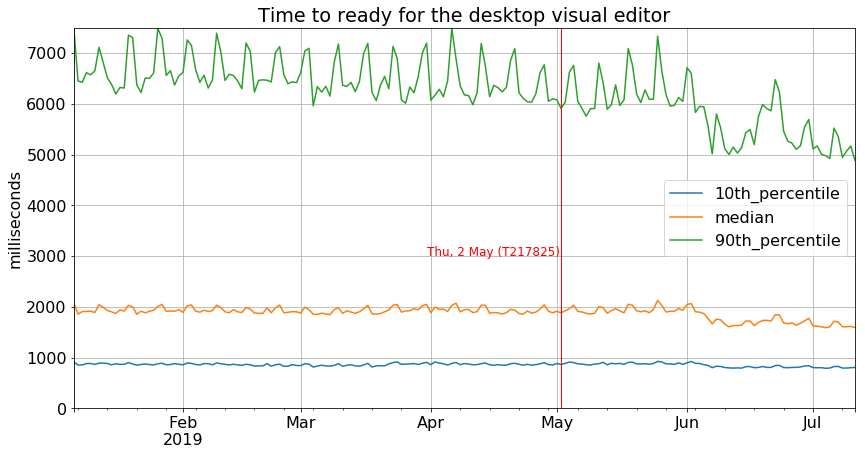

In [14]:
desk_ve_ready_times = (
    desk_ve_ready_times_r
    .rename({"_c0": "date"}, axis=1)
    .assign(date=lambda df: pd.to_datetime(df["date"]).dt.to_period(freq="D"))
    .sort_values("date")
    .set_index("date")
    .loc["2019-01-06":]
)

desk_ve_ready_times.plot(ylim=0)
plt.axvline("2019-05-02", color="red", linewidth=1)
plt.text("2019-03-31", 3000, "Thu, 2 May (T217825)", size=12, color="red")
plt.ylabel("milliseconds")
plt.xlabel(None)
plt.title("Time to ready for the desktop visual editor");

In [19]:
hive.run("""
select
    explode(histogram_numeric(event.ready_timing, 100))
from event_sanitized.editattemptstep
where
    event.platform = "desktop" and
    event.editor_interface = "wikitext" and
    event.action = "ready" and
    year = 2019 and month = 7 and day = 1
""", fmt="raw")

[('{"x":2185.944865176489,"y":38161.0}',),
 ('{"x":18675.161290322587,"y":527.0}',),
 ('{"x":31440.842657342673,"y":286.0}',),
 ('{"x":47822.75581395349,"y":172.0}',),
 ('{"x":63910.614035087754,"y":57.0}',),
 ('{"x":77141.05405405408,"y":74.0}',),
 ('{"x":91985.37037037036,"y":27.0}',),
 ('{"x":106157.13043478262,"y":46.0}',),
 ('{"x":124930.65853658534,"y":41.0}',),
 ('{"x":143395.61904761905,"y":21.0}',),
 ('{"x":158077.99999999997,"y":11.0}',),
 ('{"x":169963.75,"y":12.0}',),
 ('{"x":185119.6666666667,"y":9.0}',),
 ('{"x":196853.3333333333,"y":9.0}',),
 ('{"x":208967.5,"y":6.0}',),
 ('{"x":222408.9230769231,"y":13.0}',),
 ('{"x":244765.125,"y":8.0}',),
 ('{"x":258520.57142857142,"y":7.0}',),
 ('{"x":275786.3333333333,"y":3.0}',),
 ('{"x":295343.25,"y":12.0}',),
 ('{"x":319003.2,"y":5.0}',),
 ('{"x":336158.5,"y":4.0}',),
 ('{"x":350002.3333333333,"y":3.0}',),
 ('{"x":368383.0,"y":4.0}',),
 ('{"x":390061.0,"y":1.0}',),
 ('{"x":425532.3333333334,"y":3.0}',),
 ('{"x":443307.0,"y":3.0}'

In [17]:
_12.apply()

,col
0,"{""x"":2047.1260041495987,""y"":37594.0}"
1,"{""x"":13953.176891615538,""y"":978.0}"
2,"{""x"":25697.8832684825,""y"":257.0}"
3,"{""x"":37194.72037914694,""y"":211.0}"
4,"{""x"":49464.07407407406,""y"":81.0}"
5,"{""x"":61922.0823529412,""y"":85.0}"
6,"{""x"":77383.81428571427,""y"":70.0}"
7,"{""x"":91680.60714285716,""y"":28.0}"
8,"{""x"":106157.13043478262,""y"":46.0}"
9,"{""x"":124955.0,""y"":41.0}"
